In [7]:
import numpy as np
import matplotlib.pyplot as plt

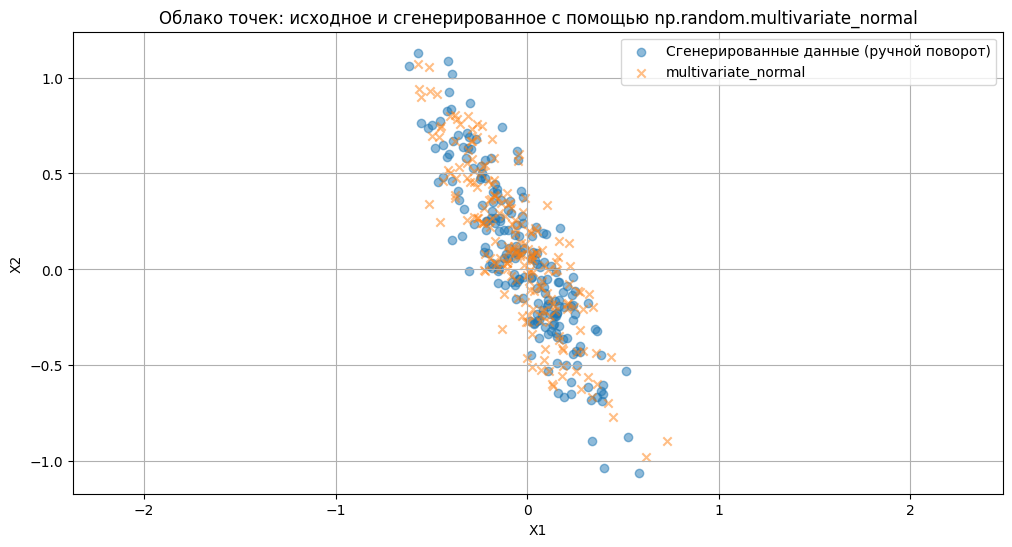

Матрица ковариации для повернутых точек:
 [[ 0.05768588 -0.09025078]
 [-0.09025078  0.18116151]]


In [8]:
# Параметры
M = 200
sigma1 = 0.1
sigma2 = 0.5
alpha_deg = 30
alpha = np.deg2rad(alpha_deg)

# Генерация двумерных данных из двух одномерных распределений
x1 = np.random.randn(M, 1) * sigma1
x2 = np.random.randn(M, 1) * sigma2
X = np.concatenate((x1, x2), axis=1)

# Матрица поворота
rotation_matrix = np.array([[np.cos(alpha), -np.sin(alpha)],
                            [np.sin(alpha),  np.cos(alpha)]])

# Поворот набора точек
X_rotated = X @ rotation_matrix.T

# Расчет матрицы ковариации для сгенерированных точек
covariance_matrix = np.cov(X_rotated, rowvar=False)

# Генерация данных с помощью np.random.multivariate_normal
mean = np.mean(X_rotated, axis=0)
X_multivariate = np.random.multivariate_normal(mean, covariance_matrix, size=M)

# Визуализация
plt.figure(figsize=(12, 6))
plt.scatter(X_rotated[:, 0], X_rotated[:, 1], alpha=0.5, label='Сгенерированные данные (ручной поворот)')
plt.scatter(X_multivariate[:, 0], X_multivariate[:, 1], alpha=0.5, label='multivariate_normal', marker='x')
plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Облако точек: исходное и сгенерированное с помощью np.random.multivariate_normal')
plt.grid(True)
plt.axis('equal')
plt.show()

# Вывод матрицы ковариации
print("Матрица ковариации для повернутых точек:\n", covariance_matrix)

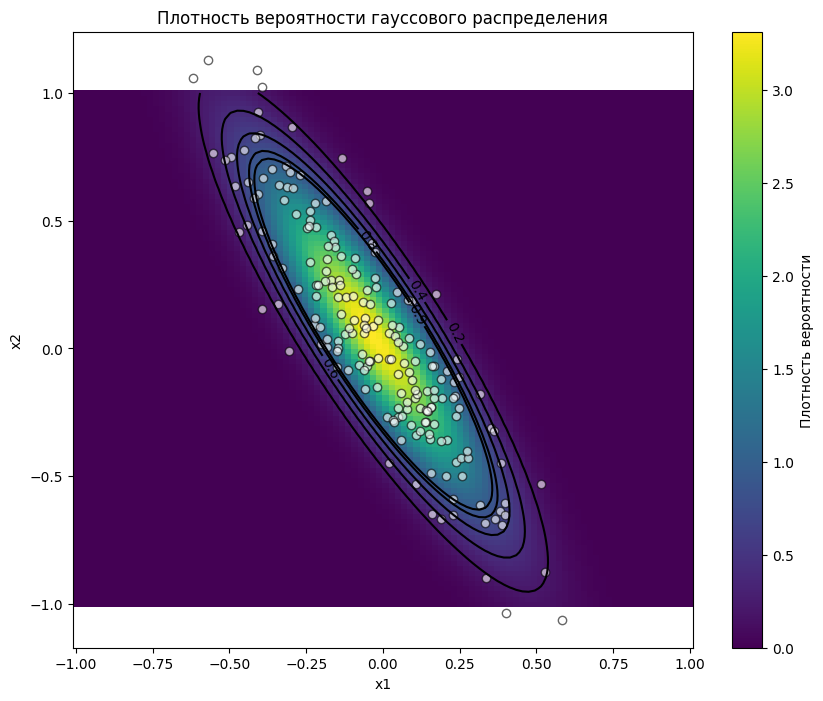

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

mean_estimated = np.mean(X_rotated, axis=0)
cov_estimated = np.cov(X_rotated.T)

xx = np.linspace(-1, 1, 100)
yy = np.linspace(-1, 1, 100)
XX, YY = np.meshgrid(xx, yy)
pp = np.stack((XX.flatten(), YY.flatten()), axis=1)

m = multivariate_normal(mean=mean_estimated, cov=cov_estimated)
ZZ = m.pdf(pp).reshape(XX.shape)

plt.figure(figsize=(10, 8))
IMG = plt.pcolor(XX, YY, ZZ, cmap='viridis')
plt.colorbar(IMG, label='Плотность вероятности')

CS = plt.contour(XX, YY, ZZ, levels=[0.2, 0.4, 0.6, 0.8, 0.9], colors='k')
plt.clabel(CS, inline=1, fontsize=10)

plt.scatter(X_rotated[:, 0], X_rotated[:, 1], alpha=0.6, color='white', edgecolors='black')
plt.title('Плотность вероятности гауссового распределения')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

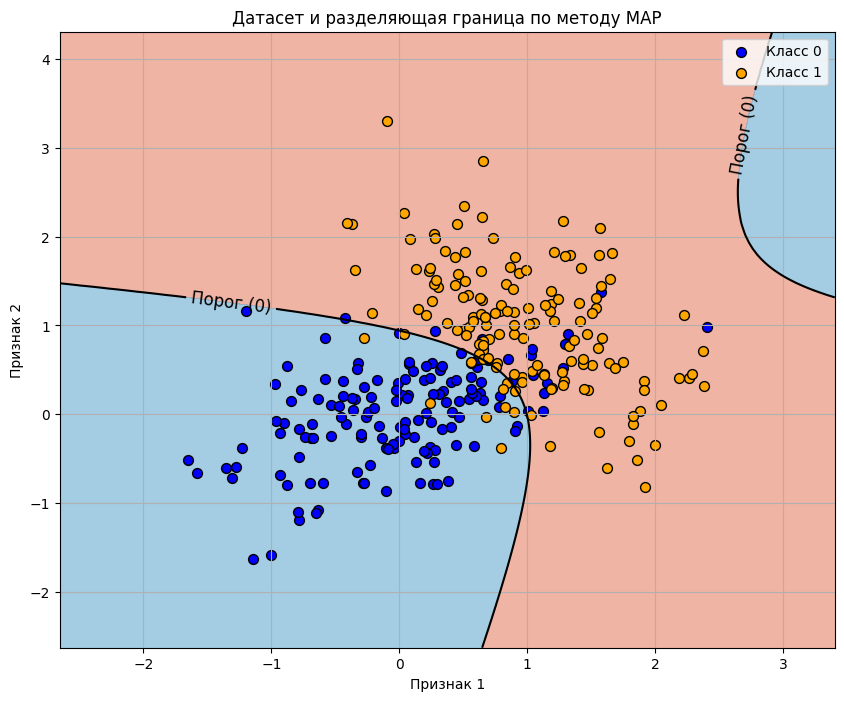

In [10]:
from scipy.stats import multivariate_normal

# Генерация данных для двух классов
np.random.seed(42)

# Параметры для класса 0
mean0 = [0, 0]
cov0 = [[0.5, 0.2],
        [0.2, 0.3]]
size0 = 150

# Параметры для класса 1
mean1 = [1, 1]
cov1 = [[0.4, -0.2],
        [-0.2, 0.5]]
size1 = 150

# Генерация точек
X0 = np.random.multivariate_normal(mean0, cov0, size0)
X1 = np.random.multivariate_normal(mean1, cov1, size1)

# Объединение данных
X = np.vstack((X0, X1))
y = np.hstack((np.zeros(size0), np.ones(size1)))

# Оценка статистик для каждого класса
mu0_est = np.mean(X0, axis=0)
C0_est = np.cov(X0, rowvar=False)

mu1_est = np.mean(X1, axis=0)
C1_est = np.cov(X1, rowvar=False)

# Оценка априорных вероятностей
p_y0 = size0 / (size0 + size1)
p_y1 = size1 / (size0 + size1)

# Создаем объекты плотности
rv0 = multivariate_normal(mean=mu0_est, cov=C0_est)
rv1 = multivariate_normal(mean=mu1_est, cov=C1_est)

# Создаем сетку для визуализации
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Вычисляем правдоподобия и априорные вероятности
p_x_given_y0 = rv0.pdf(grid_points)
p_x_given_y1 = rv1.pdf(grid_points)

# Вычисляем левую и правую части уравнения (4)
diff = p_x_given_y0 * p_y0 - p_x_given_y1 * p_y1
diff = diff.reshape(xx.shape)

# Визуализация
plt.figure(figsize=(10, 8))
# Раскрашивание фона по разнице
plt.contourf(xx, yy, diff, levels=0, cmap='RdBu', alpha=0.6)

# Точки двух классов
plt.scatter(X0[:,0], X0[:,1], c='blue', label='Класс 0', edgecolor='k', s=50)
plt.scatter(X1[:,0], X1[:,1], c='orange', label='Класс 1', edgecolor='k', s=50)

# Построение разделяющей кривой (уровень 0)
contour = plt.contour(xx, yy, diff, levels=[0], colors='k')
plt.clabel(contour, inline=1, fontsize=12, fmt='Порог (0)')

plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Датасет и разделяющая граница по методу MAP')
plt.legend()
plt.grid(True)
plt.show()

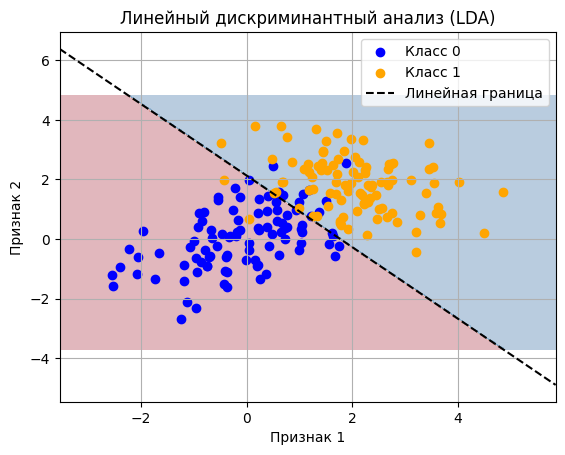

In [11]:
from sklearn.base import BaseEstimator

# Реализация класса myLDA
class myLDA(BaseEstimator):
  def __init__(self):
    self.w = None
    self.w0 = None
    self.classes_ = None
    self.means_ = None
    self.cov_ = None
    self.priors_ = None

  def fit(self, X, y):
    # Разделяем выборки по классам
    self.classes_ = np.unique(y)
    X0 = X[y == self.classes_[0]]
    X1 = X[y == self.classes_[1]]

    # Средние по классам
    mu0 = np.mean(X0, axis=0)
    mu1 = np.mean(X1, axis=0)
    self.means_ = [mu0, mu1]

    # Общая ковариационная матрица
    cov0 = np.cov(X0, rowvar=False)
    cov1 = np.cov(X1, rowvar=False)
    self.cov_ = (cov0 * (X0.shape[0] - 1) + cov1 * (X1.shape[0] - 1)) / (X.shape[0] - 2)

    # Обратная ковариационная матрица
    inv_cov = np.linalg.inv(self.cov_)

    # Веса для линейного разделения
    self.w = inv_cov @ (mu1 - mu0)

    # Свободный член
    self.w0 = -0.5 * (mu1 + mu0).T @ inv_cov @ (mu1 - mu0)

    # Аппроксимация приоритета
    self.priors_ = [np.mean(y == c) for c in self.classes_]
    return self

  def predict(self, X):
    scores = X @ self.w + self.w0
    return np.where(scores > 0, self.classes_[1], self.classes_[0])

# Генерация данных
np.random.seed(0)
X0 = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], 100)
X1 = np.random.multivariate_normal([2, 2], [[1, -0.3], [-0.3, 1]], 100)
X = np.vstack((X0, X1))
y = np.hstack((np.zeros(100), np.ones(100)))

# Обучение модели
clf = myLDA()
clf.fit(X, y)

# Визуализация
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Предсказания для сетки
Z = clf.predict(grid_points).reshape(xx.shape)

# Построение графика
plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdBu')
plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', label='Класс 0')
plt.scatter(X[y==1, 0], X[y==1, 1], c='orange', label='Класс 1')

# Линия разделения
w = clf.w
w0 = clf.w0
x_vals = np.array([x_min, x_max])
y_vals = -(w[0] * x_vals + w0) / w[1]
plt.plot(x_vals, y_vals, 'k--', label='Линейная граница')

plt.legend()
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Линейный дискриминантный анализ (LDA)')
plt.grid(True)
plt.show()

In [27]:
from sklearn.base import BaseEstimator
class myNB(BaseEstimator):
  def __init__(self):
    self.classes_ = None
    self.means_ = None  # Средние по каждому признаку для каждого класса
    self.vars_ = None   # Д variances для каждого признака и класса
    self.priors_ = None  # Приоритеты классов

  def fit(self, X, y):
    # Находим уникальные классы
    self.classes_ = np.unique(y)
    n_classes = len(self.classes_)
    n_features = X.shape[1]

    # Инициализация массивов
    self.means_ = np.zeros((n_classes, n_features))
    self.vars_ = np.zeros((n_classes, n_features))
    self.priors_ = np.zeros(n_classes)

    for idx, c in enumerate(self.classes_):
        X_c = X[y == c]
        self.means_[idx, :] = X_c.mean(axis=0)
        self.vars_[idx, :] = X_c.var(axis=0)
        self.priors_[idx] = X_c.shape[0] / X.shape[0]

    return self

  def predict(self, X):
    # Вычисляем логарифмические вероятности для каждого класса
    log_probs = []

    for idx, c in enumerate(self.classes_):
      # Расчет логарифма вероятности при условии, что признаки независимы
      mean = self.means_[idx]
      var = self.vars_[idx]
      prior = self.priors_[idx]

      # Вычисление логарифма плотности для каждого признака
      # Гауссовское распределение:
      # log p(x_i|c) = -0.5 * log(2π*var_i) - ((x_i - mean_i)^2)/(2*var_i)
      log_likelihood = -0.5 * np.sum(np.log(2 * np.pi * var)) - np.sum(((X - mean) ** 2) / (2 * var), axis=1)
      # Добавляем логарифм приоритета
      log_probs_c = log_likelihood + np.log(prior)
      log_probs.append(log_probs_c)

      # Конкатенируем по классам и выбираем класс с максимальной вероятностью
      log_probs = np.vstack(log_probs).T  # форма (n_samples, n_classes)
      y_pred_indices = np.argmax(log_probs, axis=1)
      return self.classes_[y_pred_indices]

# Пример использования:
if __name__ == "__main__":
   # Генерация случайных данных
  np.random.seed(0)
  X0 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], 100)
  X1 = np.random.multivariate_normal([3, 3], [[1, 0], [0, 1]], 100)
  X = np.vstack((X0, X1))
  y = np.hstack((np.zeros(100), np.ones(100)))

  # Обучение
  clf = myNB()
  clf.fit(X, y)

  # Предсказание
  X_test = np.array([[1, 1], [4, 4], [0, 0], [3, 2]])
  predictions = clf.predict(X_test)
  print("Предсказания:", predictions)

Предсказания: [0. 0. 0. 0.]


In [29]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Создаем датасет
X, y = make_classification(n_samples=1000, n_features=5, n_informative=3, n_redundant=0,
                           n_classes=2, random_state=42)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение LDA
lda = myLDA()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

# Обучение Naive Bayes
nb = myNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# Вычисление метрик
def print_metrics(y_true, y_pred, model_name):
  print(f"\nМетрики для {model_name}:")
  print(f"Accuracy: {accuracy_score(y_true, y_pred):.3f}")
  print(f"Precision: {precision_score(y_true, y_pred):.3f}")
  print(f"Recall: {recall_score(y_true, y_pred):.3f}")

print_metrics(y_test, y_pred_lda, "LDA")
print_metrics(y_test, y_pred_nb, "Naive Bayes")

# Выводы
# Обычно LDA лучше работает при условии, что данные нормально распределены и ковариационные матрицы классных групп схожи.
# Naive Bayes — более простой и устойчивый к некоторым нарушениям предположений, но может уступать по точности при несоблюдении условий.


Метрики для LDA:
Accuracy: 0.940
Precision: 0.962
Recall: 0.926

Метрики для Naive Bayes:
Accuracy: 0.460
Precision: 0.000
Recall: 0.000


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
